<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula05a_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [2]:
X, y = dataset.data, dataset.target
print(X.shape, y.shape)

(569, 30) (569,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# distribuição das classes

In [4]:
print(sum(y)/len(y))
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.6274165202108963
0.6285714285714286
0.6228070175438597


In [6]:
for i in range(dataset.target_names.shape[0]):
    print(f"{i}: {dataset['target_names'][i]}")

0: malignant
1: benign


In [7]:
target_names = dataset['target_names']
print(target_names)
target_names[0], target_names[1] = target_names[1], target_names[0]
print(target_names)

['malignant' 'benign']
['benign' 'malignant']


In [8]:
print(set(y))

{np.int64(0), np.int64(1)}


In [9]:
y = y*(-1)+1
print(sum(y)/len(y))

0.37258347978910367


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.37142857142857144
0.37719298245614036


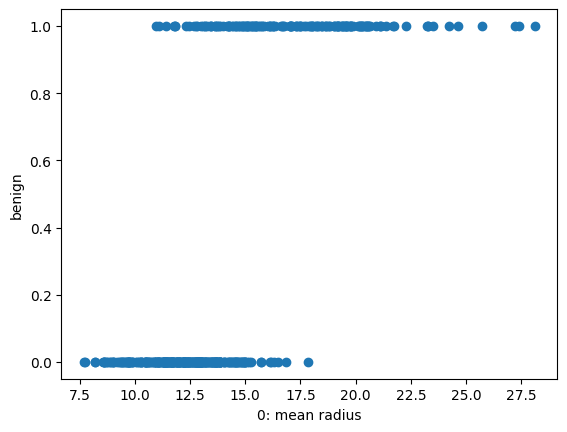

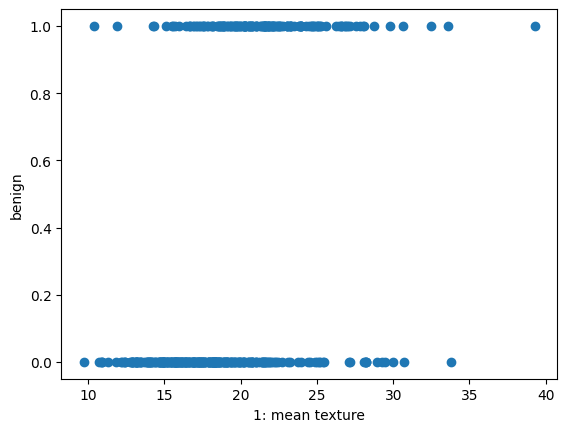

In [14]:
import matplotlib.pyplot as plt

for i in range(2):
    plt.xlabel(f"{i}: {dataset.feature_names[i]}")
    plt.ylabel(dataset.target_names[0])
    plt.scatter(X_train[:,i], y_train)
    plt.show()

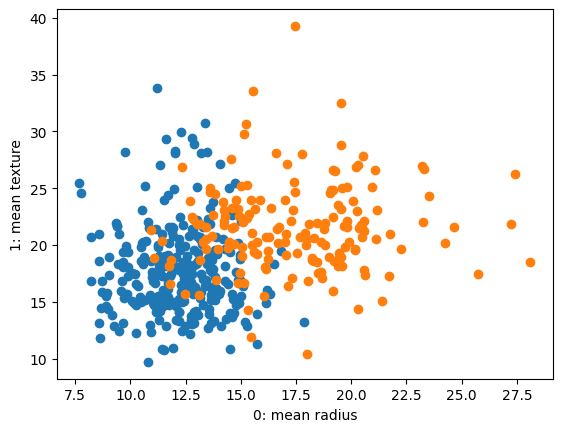

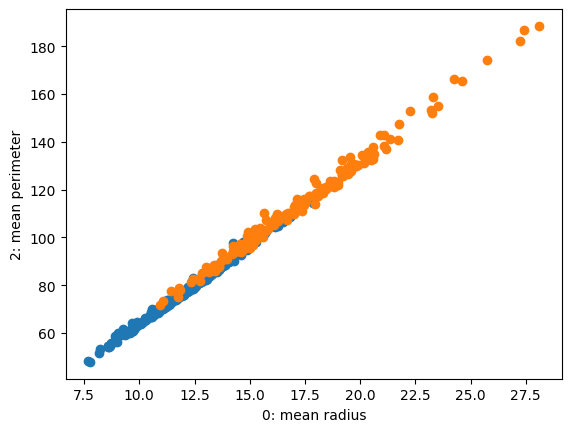

In [18]:
for i in range(1):
  for j in range(i+1, 3):
    plt.xlabel(f"{i}: {dataset.feature_names[i]}")
    plt.ylabel(f"{j}: {dataset.feature_names[j]}")
    plt.scatter(X_train[y_train==0,i], X_train[y_train==0,j])
    plt.scatter(X_train[y_train==1,i], X_train[y_train==1,j])
    plt.show()

In [16]:
X_train01 = X_train[:,[0,1]]
X_test01 = X_test[:,[0,1]]

In [27]:
import numpy as np

def add_bias(X):
  bias = np.ones((X.shape[0], 1))
  return np.concatenate((bias, X), axis=1)

class LinearClassifier():
  def fit(self, X, y):
    X = add_bias(X)
    self.w = np.linalg.pinv(X) @ y
    return self
  def predict(self, X):
    X = add_bias(X)
    return X @ self.w

model = LinearClassifier()
model.fit(X_train01, y_train)
y_pred = model.predict(X_train01)

In [28]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, y_pred))

0.1031993988568731


In [29]:
print(sum(y_train==y_pred)/len(y_train))

0.0


In [30]:
print(y_pred[:10])

[-0.12774759  1.17412904 -0.19997977  0.21021176 -0.08608171  0.61391796
  0.41085604  0.03876193  0.17438857  0.91244119]


In [36]:
print(sum(y_train==(y_pred>=0.5))/len(y_train))

0.8791208791208791


In [37]:
print(mean_squared_error(y_train, y_pred>=0.5))

0.12087912087912088


In [71]:
class LinearClassifier():
  def fit(self, X, y):
    X = add_bias(X)
    self.w = np.linalg.pinv(X) @ y
    return self
  def predict(self, X):
    X = add_bias(X)
    return X @ self.w >= 0.5

model = LinearClassifier()
model.fit(X_train01, y_train)
y_pred = model.predict(X_train01)
print(mean_squared_error(y_train, y_pred))
print(sum(y_train==y_pred)/len(y_train))

0.12087912087912088
0.8791208791208791


In [72]:
mse = mean_squared_error(y_train, y_pred)
acc = sum(y_train==y_pred)/len(y_train)
print(f"mse: {mse:.4f} + acc: {acc:.4f} = {mse+acc}")

mse: 0.1209 + acc: 0.8791 = 1.0


In [73]:
def plot_dataset(X, y, target_names=None):
  plt.xlabel("x1")
  plt.ylabel("x2")
  for k in set(y):
    plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3,
             label=target_names[k] if target_names is not None else k)
  plt.legend()

def define_axes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plot_predictions(clf, X):
    axes = define_axes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

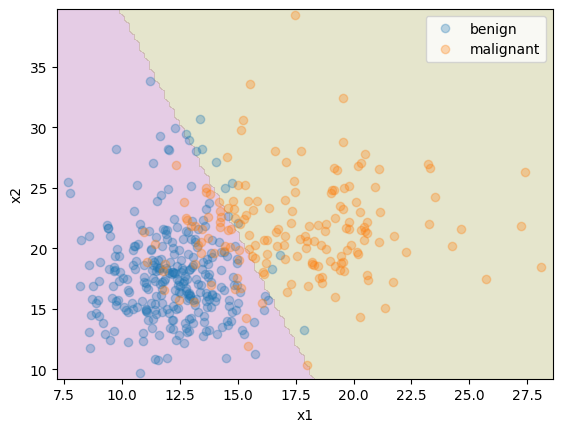

In [74]:
plot_dataset(X_train01, y_train, target_names)
plot_predictions(model, X_train01)

In [86]:
from sklearn.metrics import accuracy_score

def assess_classifier(model, X, y, target_names=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(type(model))
  print(f"accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

model = LinearClassifier()
assess_classifier(model, X, y, target_names)

<class '__main__.LinearClassifier'>
accuracy: 0.9561



In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
    LinearClassifier(),
    LogisticRegression(max_iter=9999),
    KNeighborsClassifier(),
    RandomForestClassifier()
]

for model in models:
  assess_classifier(model, X, y, target_names)


<class '__main__.LinearClassifier'>
accuracy: 0.9561

<class 'sklearn.linear_model._logistic.LogisticRegression'>
accuracy: 0.9561

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
accuracy: 0.9561

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
accuracy: 0.9649



In [97]:
def assess_classifier(model, X, y, target_names=None, random_state=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(type(model))
  print(f"accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

for model in models:
  assess_classifier(model, X, y, target_names, 44)

<class '__main__.LinearClassifier'>
accuracy: 0.9912

<class 'sklearn.linear_model._logistic.LogisticRegression'>
accuracy: 0.9737

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
accuracy: 0.9561

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
accuracy: 0.9649

